# COMP3670/6670 Week 5: Clustering 

In this tutorial, we'll be covering k-means clustering. We'll do this by implementing the algorithm, and using it to cluster some toy datasets.

### Before you start, you should understand:
* Goals of unsupervised learning
* Programming with numpy & matplotlib

If you are not comfortable with any of these topics, you should discuss with your tutors in the drop-in session.

### After this lab, you should be comfortable with the: 
* goals of clustering
* K-means clustering algorithm
* metrics of clustering algorithms

In [2]:
# Set-up code
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Jupyter magic for inline figures
%matplotlib inline 

mpl.rcParams['image.cmap'] = 'Accent' # Changing the default colour-scheme for readability

## What is clustering?

Clustering is a form of *unsupervised learning* where we aim to group our data into disjoint sets of similar elements called "clusters". We can descibe this more formally as follows:

Given a data set $D = \{\textbf{x}_1, \ldots \textbf{x}_N \}$,
we would like to classify the data set into $K$ many clusters,
grouping the points into the clusters based on similarity. 

For each point $\textbf{x}_n$, we introduce the binary indicator 
$r_{nk} \in \{0,1\}$, which indicates to which cluster $\textbf{x}_n$ belongs.

$$
r_{nk} = \begin{cases}
1 & \textbf{x}_n \text{ is assigned to cluster }k \\
0 & \text{otherwise} \end{cases}	
$$

We also introduce a collection of vectors $\{ \boldsymbol{\mu}_1, \ldots \boldsymbol{\mu}_K \}$,
where $\boldsymbol{\mu}_k$ is a vector that represents cluster $k$.

The loss function (which measures the squared distance of 
how far each data point $\boldsymbol{x}_n$ is away from the 
representative vector $\boldsymbol{\mu}_k$ of its cluster) is given by

$$
L = \sum_{n=1}^N \sum_{k=1}^K r_{nk} ||\textbf{x}_n - \boldsymbol{\mu}_k||_2^2
$$

In this lab, we will explore the k-means clustering algorithm for solving this problem.

To do this, we'll start out by generating a dataset to perform clustering on. Sklearn has a handy function called `make_blobs` which draws datapoints from several Gaussian distributions to form a dataset with multiple different "groups" of data. Our goal will be to use clustering techniques to figure out which Gaussian each datapoint was drawn from. We can then use the `labels` return value of `make_blobs` as our ground truth to compare our results against. 

**Exercise:**
Complete the `plot_2d_clusters` function below. It should take the 2-d data and labels generated from `make_blobs` and generate a scatterplot with each label given a unique colour. 
*Hint:* use the `c` parameter of `plt.scatter`.

In [1]:
def plot_2d_clusters(data, labels):
    """Plot a set of 2-d datapoints (data) with colours according to the label."""
    
    plt.scatter(data[:, 0], data[:, 1], c=labels)

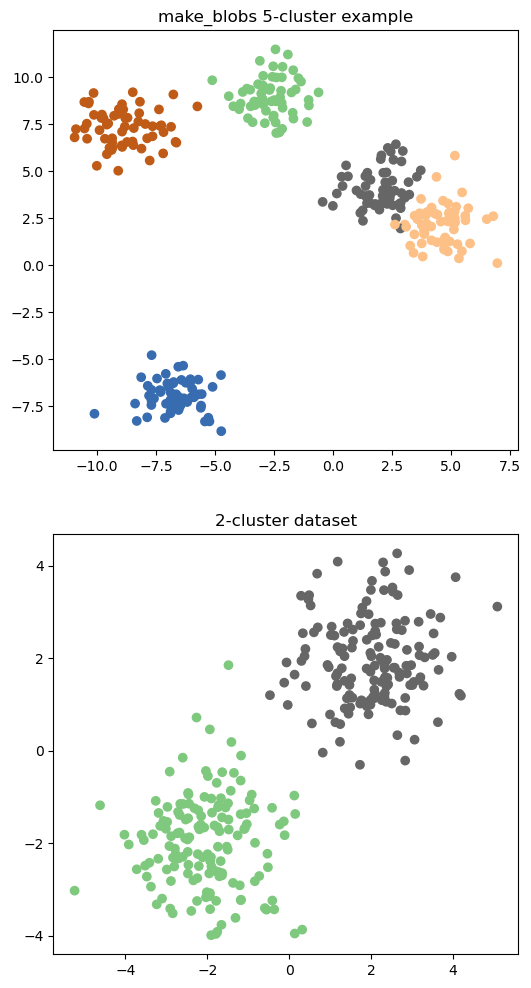

In [3]:
# Clustering Visualisation Test Code

from sklearn.datasets import make_blobs # Function for generating Gaussian clusters

centers = 5 # Number of clusters.
n_samples = 300 # Number of datapoints to generate

random_state = 42 # Random seed
data, labels = make_blobs(centers=centers, n_samples=n_samples, random_state=random_state)

plt.figure(figsize=(6, 12))

plt.subplot(211)
plt.title("make_blobs 5-cluster example")
plot_2d_clusters(data, labels)

# Generate the dataset we'll use for the rest of this lab.
centers = [(-2, -2), (2, 2)] # We can also specify centroid coordinates
data, labels = make_blobs(centers=centers, n_samples=n_samples, random_state=random_state)

plt.subplot(212)
plt.title("2-cluster dataset")
plot_2d_clusters(data, labels)

plt.plot()
None # Don't display output

## K-Means Clustering

The algorithm we focus on in this course is **K-Means clustering**. K-Means clustering starts by making a random "guess" at the location of centroids, then iteratively optimises the loss function (defined below) until reaching a local minimum.  


For each point $\textbf{x}_n$, we introduce the binary indicator 
$r_{nk} \in \{0,1\}$, which indicates to which cluster $\textbf{x}_n$ belongs.

$$
r_{nk} = \begin{cases}
1 & \textbf{x}_n \text{ is assigned to cluster }k \\
0 & \text{otherwise} \end{cases}	
$$

We introduce a collection of vectors $\{ \boldsymbol{\mu}_1, \ldots \boldsymbol{\mu}_K \}$,
where $\boldsymbol{\mu}_k$ is a vector that represents cluster $k$.

The loss function (which measures the squared distance of 
how far each data point $\boldsymbol{x}_n$ is away from the 
representative vector $\boldsymbol{\mu}_k$ of its cluster) is given by

$$
L = \sum_{n=1}^N \sum_{k=1}^K r_{nk} ||\textbf{x}_n - \boldsymbol{\mu}_k||_2^2
$$



We can implement the `k_means_clustering` function to cluster 2-dimensional data using scikit-learn, assuming k=2.

In [4]:
from sklearn.cluster import KMeans 
def k_means_clustering(data, k=2): #The default k=2 only because of convenience in this exercise. Is this always true?
    """Cluster a dataset using the K-means clustering algorithm.
    
    Note that you need to return an array of integers (either 0 or 1) for each datapoint representing which
    of the two clusters they belong to. Remember that labels are arbritrary (i.e. you can swap all 0s and 1s)."""
    kmeans = KMeans(n_clusters=k).fit(data) 
    return kmeans.labels_ 

/home/r10x8596/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


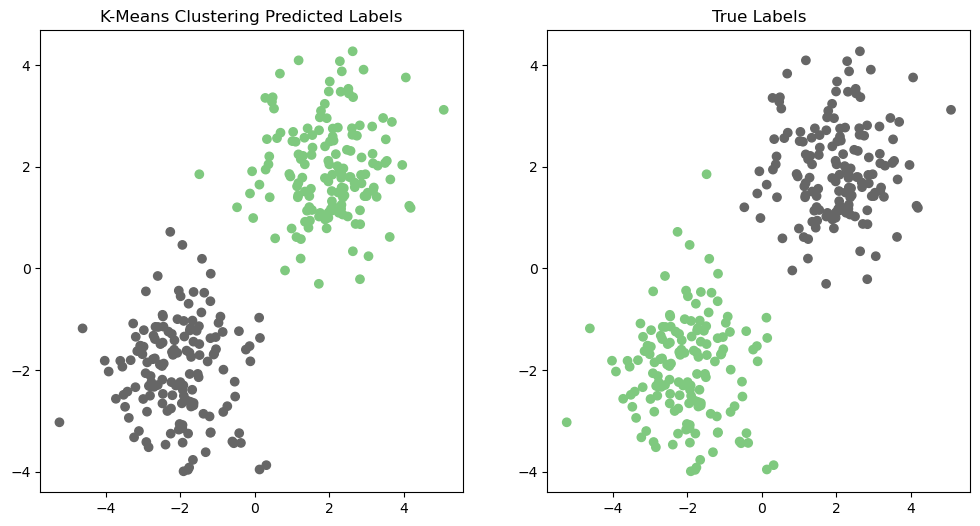

In [5]:
# K-Means Test Code

pred_labels = k_means_clustering(data)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.title("K-Means Clustering Predicted Labels")
plot_2d_clusters(data, pred_labels)

plt.subplot(122)
plt.title("True Labels")
plot_2d_clusters(data, labels)


plt.plot()
None # Don't display output

## K-Means Clustering

We'll use four metrics:

1. Visual Inspection
2. Accuracy
3. Loss
4. Runtime

The code necessary for visual inspection and runtime analysis is provided for you below.

**Exercise:** Implement the `accuracy` and `loss` functions below. `Accuracy` is defined as $\frac{\textrm{\# of correct predictions}}{\textrm{\# of predictions}}$, and `loss` is defined as the loss function for k-means clustering (above).

In [6]:
def accuracy(pred_labels, true_labels):
    """Compute the accuracy of the predicated labels vs the true labels.
    
    Remember that the labels may be inverted (i.e. the original 0s may now be the 1s).
    You should use whichever set of labellings have the best accuracy. """
    
    acc = (true_labels == pred_labels).sum() / pred_labels.shape[0]
    return max(acc, 1-acc)

def sum_of_squares(data):
    """Find the sum total disance of the datapoints from the centroid."""
    centroid = data.mean(axis=0)
    distances = data - centroid
    return np.sum(distances**2)

def loss(data, labels):
    """Compute the loss of the dataset according to the predicted labels.
    
    Hint: it may be useful to use a helper function to compute the loss for each centroid."""
    bool_labels = labels == 1
    pos_data = data[bool_labels]
    neg_data = data[~bool_labels]
    return (sum_of_squares(pos_data) + sum_of_squares(neg_data))
    
    

K-Means Clustering Runtime: 82.3ms

K-Means Clustering Accuracy: 90.67%

Average Loss (True): 1.89
Average Loss (K_Means): 1.67


/home/r10x8596/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


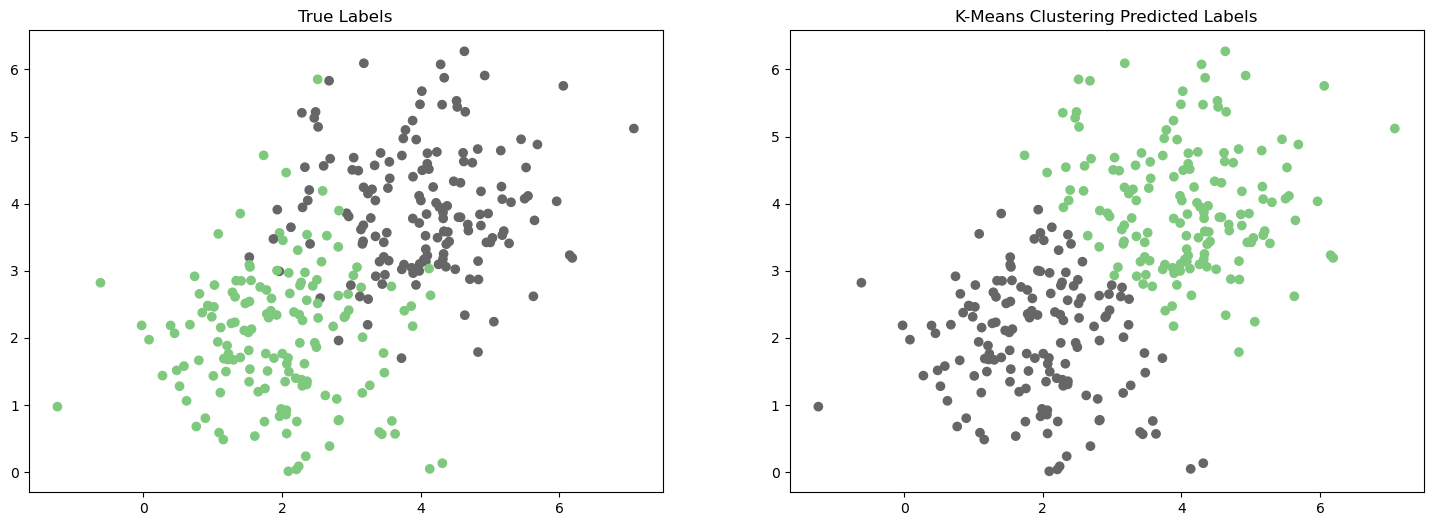

In [7]:
from time import process_time

# Clustering Comparison Test Code
centers = [(2, 2), (4,4)]
data, labels = make_blobs(centers=centers, n_samples=n_samples, random_state=random_state)

before_time = process_time()
k_means_labels = k_means_clustering(data)
duration = process_time() - before_time
print(f"K-Means Clustering Runtime: {duration * 1000:.1f}ms")
print()

#Print statistics
print(f"K-Means Clustering Accuracy: {accuracy(k_means_labels, labels) * 100:.2f}%")
print()
print(f"Average Loss (True): {loss(data, labels)/n_samples:.2f}")
print(f"Average Loss (K_Means): {loss(data, k_means_labels)/n_samples:.2f}")

plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.title("True Labels")
plot_2d_clusters(data, labels)

plt.subplot(122)
plt.title("K-Means Clustering Predicted Labels")
plot_2d_clusters(data, k_means_labels)

plt.plot()
None # Don't display output

         k   accuracy       loss
         2      0.750   9416.214
         4      0.503   9416.214
         6      0.503  18316.524
         8      0.853  18265.729
        10      0.920  18357.467


/home/r10x8596/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/r10x8596/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/r10x8596/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/r10x8596/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/r10x85

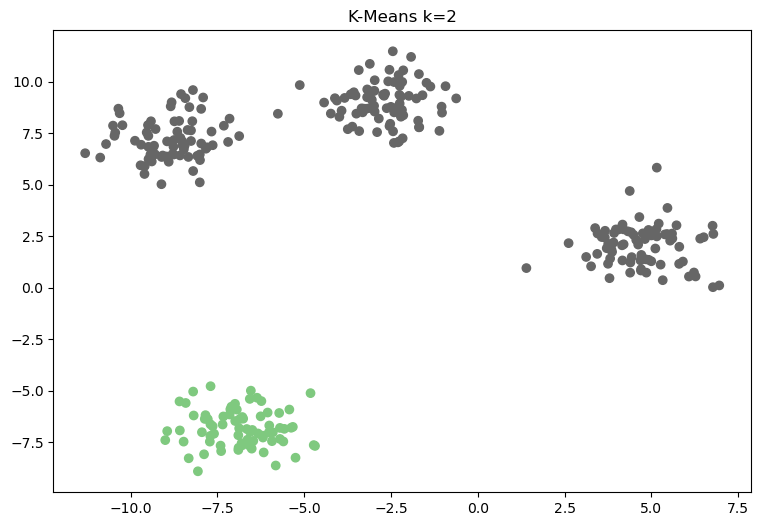

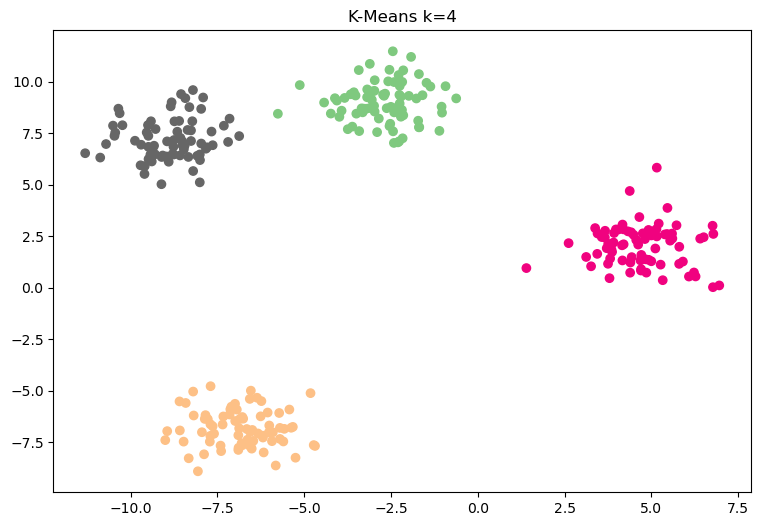

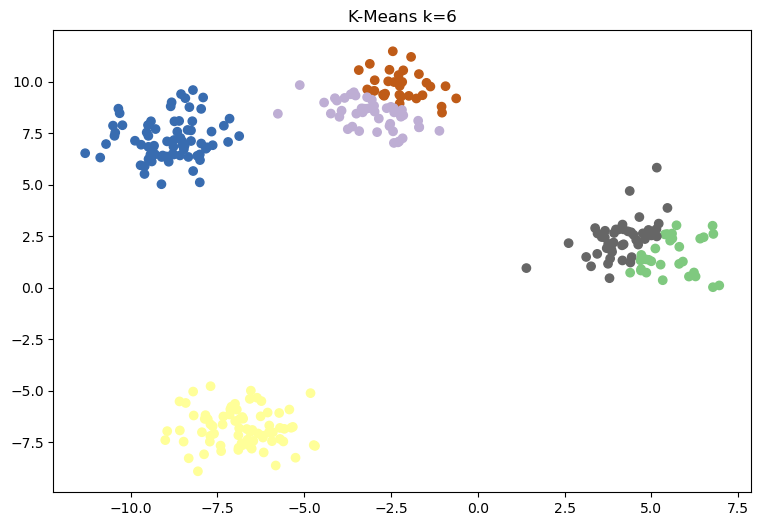

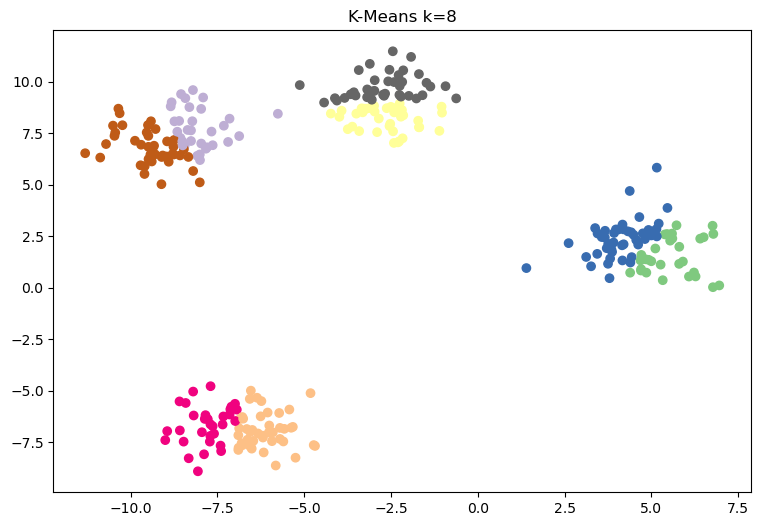

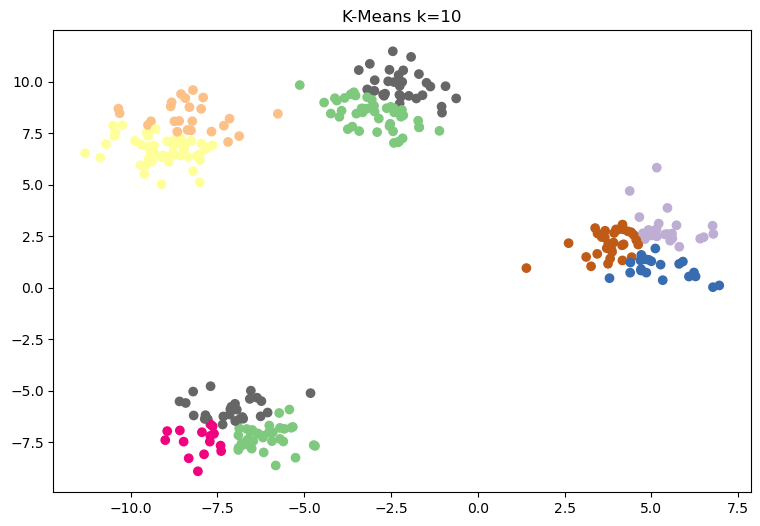

In [9]:
# Choice of k
# Feel free to change the number of centers. We can start with 4
centers = 4
data, labels = make_blobs(centers=centers, n_samples=n_samples, random_state=random_state)

print("         k","  accuracy","      loss")
for k in [2,4,6,8,10]:
    """What accuracy and loss would you get by calling k-means on the sane data for these values of k?"""
    """Will the implementations for loss and accuracy still work? Discuss."""
    k_means_labels = k_means_clustering(data, k)   
    acc = accuracy(k_means_labels, labels)
    ls = loss(data, k_means_labels)
    print('{:10}'.format(k), '{:10.3f}'.format(acc), '{:10.3f}'.format(ls))

    """What do the clusters look like?"""

    plt.figure(figsize=(9, 6))
    plt.title("K-Means k="+str(k))
    plot_2d_clusters(data, k_means_labels)

None # Don't display output

**Exercise:** What do you notice in terms of the performances of k-means clustering? Discuss the results with your neighbours, and try to explain why each observation may occur:

* Runtime: 
* Accuracy & Loss: 
* Visual Observations: 

**Exercise:** For k-means clustering, what factors affects the run time? 

Answer: 

**Exercise:** You should notice that the average loss for K_Means is less than the average loss for the true labels. Does this make sense? What causes it?

Answer: 